In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('C:/Users/91637/OneDrive/Desktop/EXCELAR ASSIGNMENT/8 Clustering/EastWestAirlines.xlsx', sheet_name='data')

In [4]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df.shape

(3999, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
df.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3994    False
3995    False
3996    False
3997    False
3998    False
Length: 3999, dtype: bool

In [9]:
## Null Values
for i in df.columns:
    print(i,'-',df[i].isnull().sum())

ID# - 0
Balance - 0
Qual_miles - 0
cc1_miles - 0
cc2_miles - 0
cc3_miles - 0
Bonus_miles - 0
Bonus_trans - 0
Flight_miles_12mo - 0
Flight_trans_12 - 0
Days_since_enroll - 0
Award? - 0


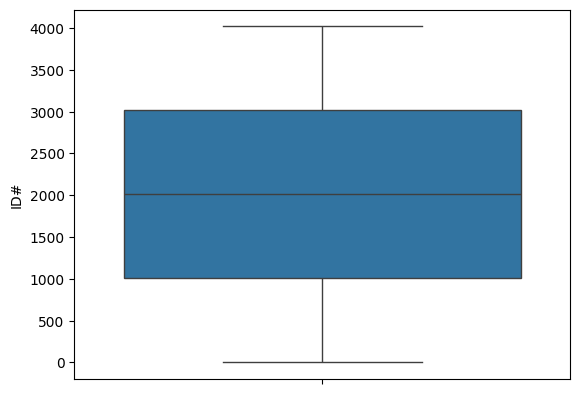

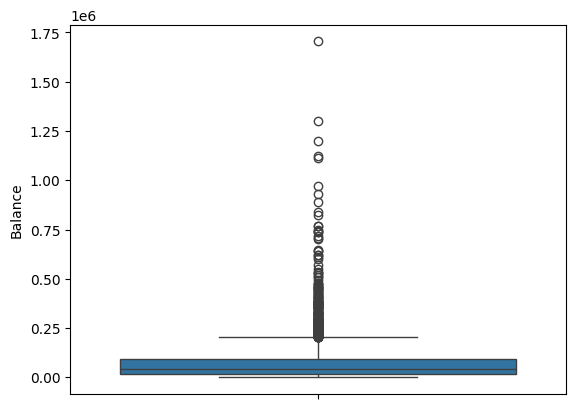

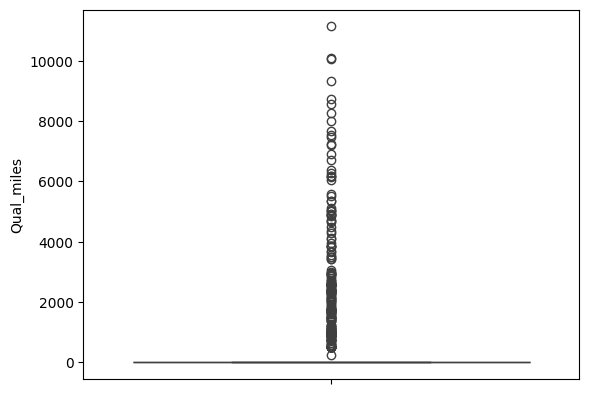

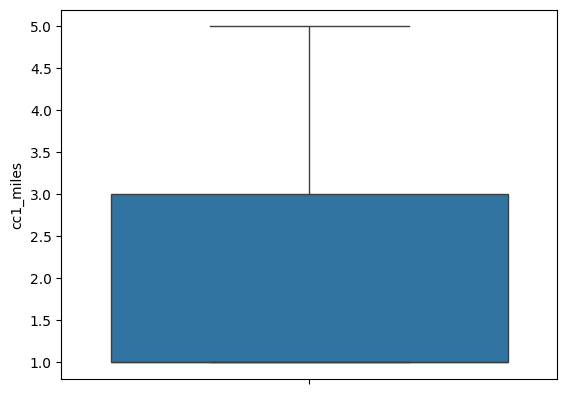

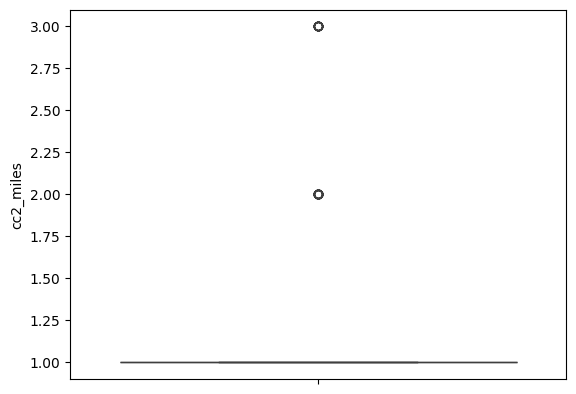

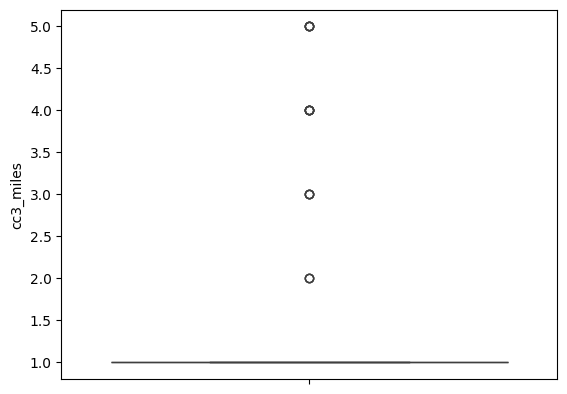

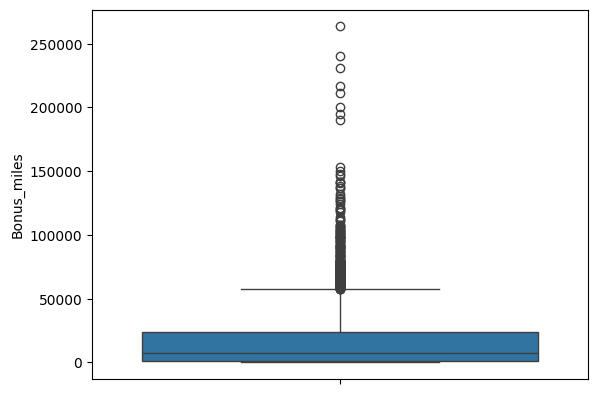

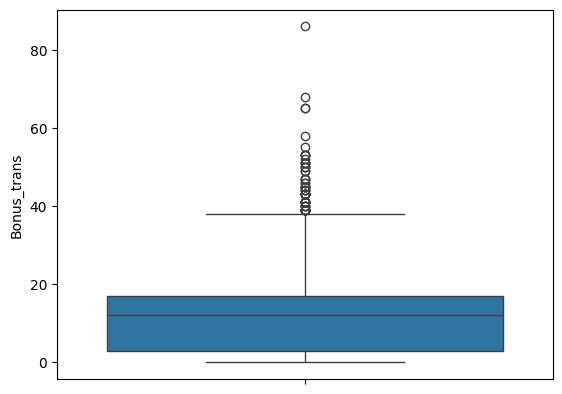

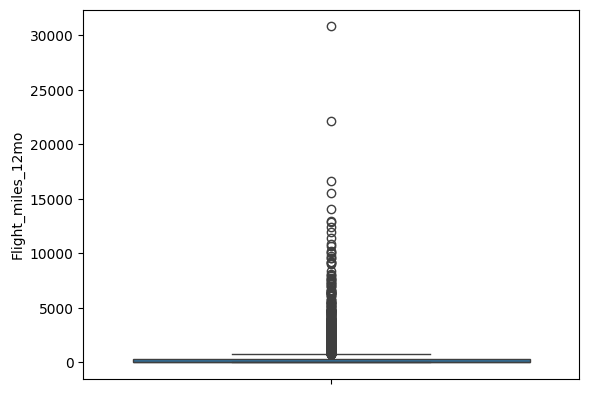

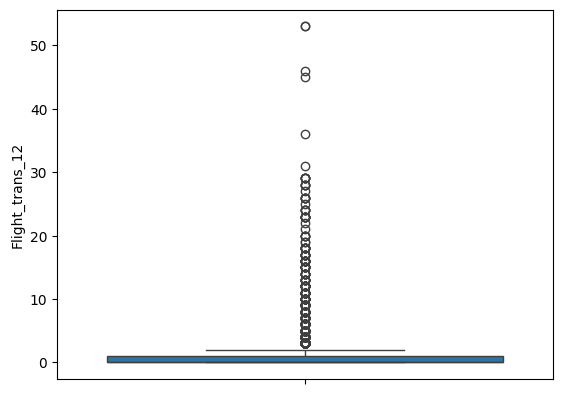

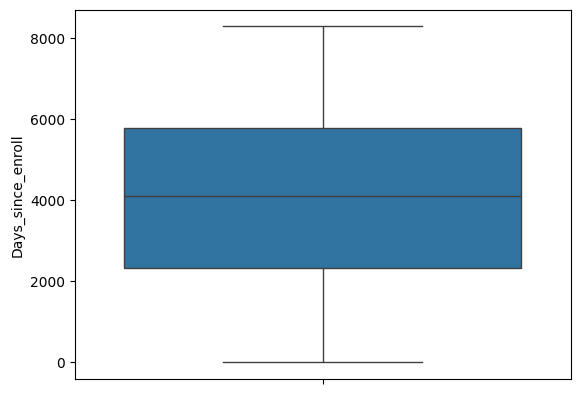

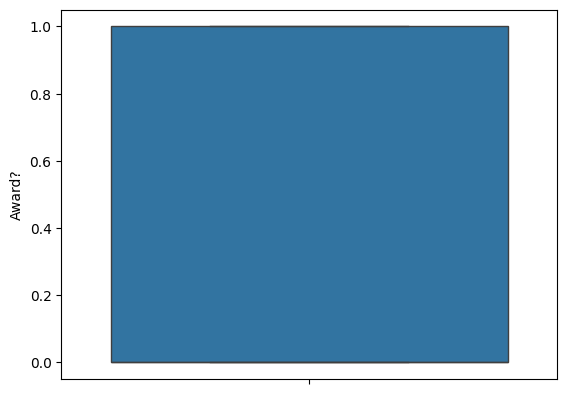

In [10]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [11]:
outlier_cols = []

for i in df.columns:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    lower = q1 - (1.5 * IQR)
    higher = q3 + (1.5 * IQR)  

    # Check for outliers
    outliers = df[(df[i] < lower) | (df[i] > higher)][i]

    if not outliers.empty:
        outlier_cols.append(i)
        print('Column_Name :', i, '|', 'Lower_bound :', lower, '|', 'Higher_bound :', higher)
        print()
        print('All The Outlier Values : \n\n', outliers.values)
        print()
        print()
        print('-' * 90)
        

print("Columns with outliers:", outlier_cols)

Column_Name : Balance | Lower_bound : -92287.25 | Higher_bound : 203218.75

All The Outlier Values : 

 [ 443003  205651  276571  619393  288865  362642  230715  252386  550367
  609477  298911  295638  969559  205126  602064  213150  259484  930410
  298121  220081  212976  228829  402874  370941  352508  451673  707079
  211595  410795  386061  204582 1302051  229744  285116  227881  468175
  236274  423540  402312 1704838  568174  294881  238868  217846  364387
  383030  714717  766419  205523  278727  455228  388455  278457  312512
  224081  222227  377252  479989  205292  507506  267640  620498  225802
  529886  491987  251286  353678  229397  383129  382546 1113394  459681
  743745  235947  260261 1125076 1199220  207545  217557  889456  346178
  208519  413509  267404  256219  213849  380930  329497  427528  338656
  365918  747983  415070  347096  257068  323459  280561  232171  369816
  234327  463494  529477  417875  340874  242910  238749  384470  440265
  237093  210018  24

###  Kmeans Clustering

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [13]:
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)


In [14]:
scaled_df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,1.725958,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,1.726820,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,1.727682,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [15]:
new_df=scaled_df

In [16]:
from sklearn.cluster import KMeans

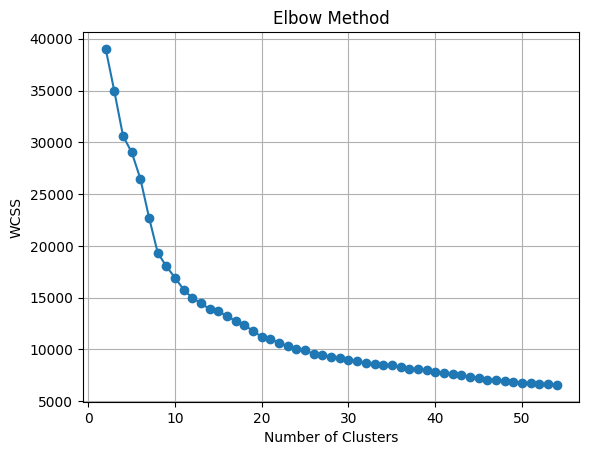

In [17]:
wcss = []
for i in range(2, 55):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(scaled_data)
    wcss.append(km.inertia_)

plt.plot(range(2, 55), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

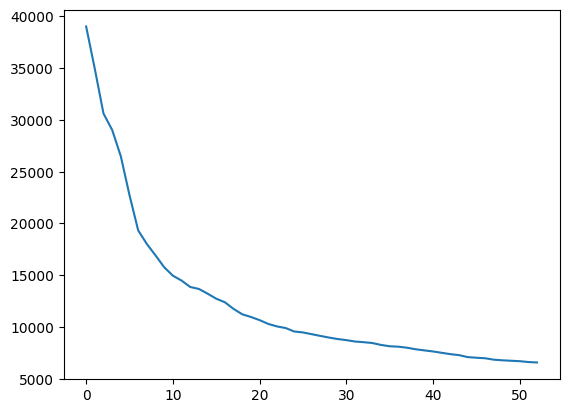

In [18]:
plt.plot(wcss)

In [19]:
km= KMeans(n_clusters=10, init='k-means++',n_init=10)

In [20]:
pred_cluster=km.fit_predict(scaled_data)
pred_cluster

array([3, 3, 3, ..., 0, 1, 1], dtype=int32)

In [21]:
scaled_df['clustring']=pred_cluster

In [22]:
scaled_df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustring
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,3
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,3
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,3
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,3
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,1
3995,1.725958,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,1
3996,1.726820,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,0
3997,1.727682,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,1


In [23]:
from sklearn.metrics import silhouette_score
silhouette_score(new_df,pred_cluster)

np.float64(0.4039923019168196)

In [24]:
from sklearn.metrics import silhouette_score
sil = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    sil.append(silhouette_avg)

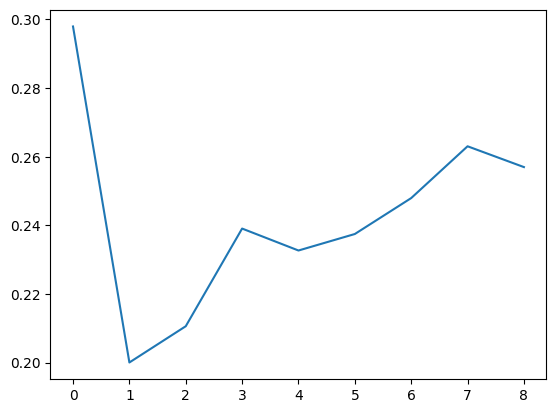

In [25]:
plt.plot(sil)

### Hierarchical Clustering

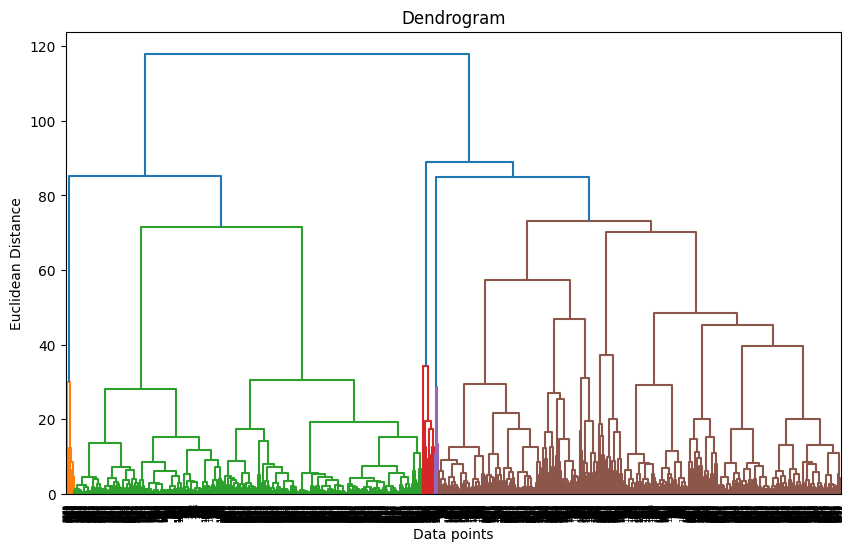

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

link = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(link)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean Distance')
plt.show()




In [28]:
# Agglomerative clustering
agg = AgglomerativeClustering(n_clusters=4)
agg_labels = agg.fit_predict(scaled_data)
df['Hierarchical_Cluster'] = agg_labels